# 変数

プログラムを書く時に何げなく使っている変数について深堀します。

## 変数とは

値を入れる「箱」というような説明がありますが、それ以外になかなかうまい説明は難しいです。  
値を覚えておいて後で使ったり、書き換えたり、いろいろするために必要なものです。

## 変数の目的

変数というのは値を覚えておく「箱」「記憶領域」ですが、覚えておくだけでは意味がなく、後で使いたいからこそ覚えるものです。  
後で使う予定のない値は変数にわざわざ覚えておく必要はありません。

例えば以下の計算式を例にすると

$$
(2 + 3) * 4
$$

かっこの中を計算（2+3=5)してメモしておき、後で掛け算して答えを出す人がいます。

$$
(2 + 3)*4 \\
2 + 3 ⇒ 5 \\
5 * 4
$$

これは、2+3の結果を一時的に覚えておくための変数を用意したことにイメージは近いです。

またある人は、かっこの中を分解して(2\*4)と(3\*4)を別々に計算してメモしておき、後で足すかもしれません。

$$
(2 + 3) * 4 \\
2 * 4  \quad 3*4 \\
⇒8 \quad ⇒12 \\
8 + 12
$$

この場合、8 や 12 を覚えるために変数を2つ用意しています。

暗算が得意な人は、一時的なメモなど残さず、一気に答えを出せるかもしれません。  
そのような人には、この程度の計算で変数は必要ありません（頭の中では変数相当の記憶領域を作って計算してるかもしれませんが・・・）。

プログラムも同じで、細かく分けて変数に代入しつつロジックを作る人もいれば、変数をほとんど使わずに書く人もいます。  
可読性、効率化、性能、人それぞれ重視するところの違いによって変数の使い方も変わります。

## プログラム言語ごとの変数定義の違い

どのようなプログラムでも変数というのは使えますが、その構文や仕様に違いがあります。

- 事前定義が必要か、未定義でも使用することが出来るか
- 変数の適用範囲（スコープ）に関する仕様の違い
- 変数の型指定が必須か、不要か
- 関数への引数渡しや変数同士の代入の考え方の違い（実体渡し、参照渡し）

この中で、もしかしたら理解していない人がいるかもしれない、最後について詳細を記載します。

### 変数におけるデータ管理の種類

#### 1) 変数自身が実体を持つ

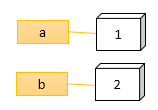

例）java

```java
int a = 1;
int b = 2;
```

aとbは独立したメモリ領域を持っており、そのメモリ領域に実際の値自体が入っている。  
各言語におけるプリミティブ型はほとんどがこの管理方法。

#### 2) 変数は参照を持つ


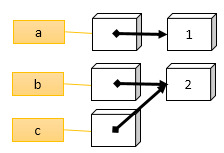

例）java

```java
Integer a = 1;
Integer b = 2;
Integer c = b;
```

a, b, c は独立したメモリ領域を持っているが、そのメモリ領域は変数実体への参照を格納している。

- 変数への代入は参照先を変更する行為
- 参照先の操作によって、別の変数が参照している内容も変わることがある

#### 3) 変数名がエイリアス

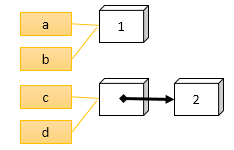

例）c++

```c++
int a = 1;
int& b = a;
int* c = new int(2);
int*& d = c;
```

複数の変数が同じメモリ領域を示している。  
変数に別名が付けられているのと同じ効果であり、どちらかの変数への代入によって両方の値が変わる。

VBAの `ByRef` による引数渡しも同じ管理。

## 関数呼び出しによる変数の受け渡し

どのようなプログラム言語でも、関数のように別定義された一連の処理を呼び出す方法が用意されてます。  
この関数にはいくつかパラメータを渡すこともでき、その先の関数では変数としてその内容を受け取ります。

- 例) java

```java
public int max(int a, int b) {
    return a > b ? a: b;
}
```

- 例) c言語

```c
int max(int a, int b)
{
    return a > b ? a: b;
}
```

- 例) python

```python
def max(a, b):
    return a if a > b else b
```

- 例) VBA

```vbscript
Function max(a as Integer, b as Integer)
    max = IIf(a > b, a, b)
End Function
```

上記に共通していることは、関数として受け取りたいパラメータに変数を定義していることです。

この変数は、関数が呼び出された時に初めてメモリ領域が確保され、呼び出し元で指定した引数がそのメモリ領域にコピーされます。

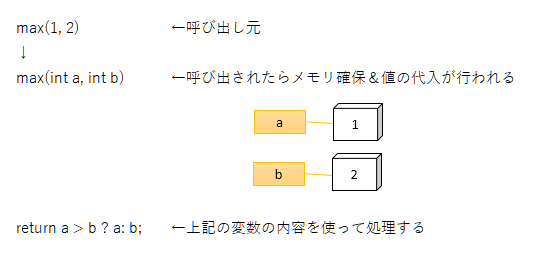

よく、関数の再帰呼び出しで躓く人がいますが、そのような人は上記の仕組みを理解できていないことが起因していることも多いです。

- 例) java で $n!$ を処理する関数

```java
int fact(int n) {
    return n > 1 ? n * fact(n - 1): 1;
}
```

上記メソッドを、例えば `fact(5)` のように $5!$ を計算するとします。

```java
fact(5);
↓
int fact(int n) {← n に 5 が渡ってくる
  return n > 1 ?
    n * fact(n - 1): 1;
}       ↓
        ↓
    int fact(int n) { ← n に 4 が渡ってくる
      return n > 1 ?
        n * fact(n - 1): 1;
    }
```

factの中でさらにfactを呼び出していますが、プログラム上は同じ `n` という変数名を使っていても、上記の1回目と2回目の fact では、`n`が示すメモリ領域は別となっています。  
変数名が同じだからといって、同じメモリ領域だとは限らないことを理解しないといけません。

逆に、言語によっては以下のような記載も出来ます。

- 例） c++

```c++
void floor(double& a)
{
    a = (int)a;
}

double b = 3.4;
floor(b);
// bが3.0になる
```

- 例） VBA

```vbscript
Sub floor(ByRef a As Double)
    a = CDbl(CInt(a))
End Sub

Dim b As Double
b = 3.4
floor b
' bが3.0になる
```

上記は変数の参照渡しにより、別名の変数であっても同じメモリ領域を共有することで、値の変更が相互に反映されています。

このように、変数名だけで同じメモリを共有しているわけではありません。  
これら特性をよく理解しないと、正しいプログラムが書けません。

## C言語の鬼門ポインタ

CやC++で、ポインタの概念が理解できずに苦労している人をよく見かけます。  
ポインタの概念は、前述した「**2) 変数は参照を持つ**」という管理方法を実現しているものです。

ポインタが難しいという原因としては、この参照という概念が分からないというよりも、メモリを割り当てたら解放を行わないといけないという、メモリ管理の煩雑さの方を理由としている人も多いのではないでしょうか？

ここではメモリ管理のことは置いておいて、ポインタ変数についての特性を記載します。

よく使う char 配列を例にします。

```c++
char buf[10];
char* ptr = buf;
```

これをメモリイメージで図示すると以下のようになります。

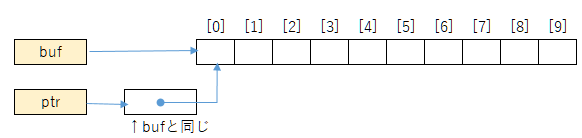

`buf`は char型10個の配列をメモリとして確保し、`buf`という変数名はその配列の先頭アドレスを示す意味となります。  
その`buf`を代入した`ptr`はポインタ型ですが、参照先のアドレスを保持するためのメモリを確保し、そのメモリに実体として参照する `buf` と同じアドレスが入ります。

配列`buf`とポインタ`ptr`の大きな違いは、`ptr`の方は参照先となる実体のアドレスを保持するためのメモリが割り当てられますが、配列`buf`の方にはありません。

どちらも、配列の実体にアクセスする際には、同じような記述が可能です。

```c++
buf[1] == ptr[1];
int x = 3;
buf[x] == ptr[x];
```

上記の2つの変数の大きな違いとしては、`ptr`の方は実体を参照するためのメモリが確保されていることから、その中身を変えることが出来ます。  
具体的には以下のような記載が可能です。

```c++
ptr++;
```

上記によって、`ptr`が保持していた参照先アドレスが、参照先アドレス+1 と変更されます。

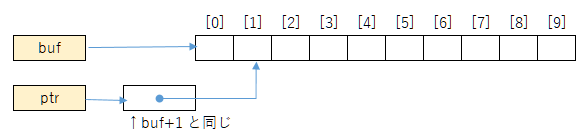

このように、`ptr`は`buf + 1`を参照先になるように変更されました。  
配列として定義した`buf`では、このようなアドレス変更の計算は出来ません。


上記のように `ptr = buf + 1` となった状態で、変数を使った記述は以下のように解釈されます。

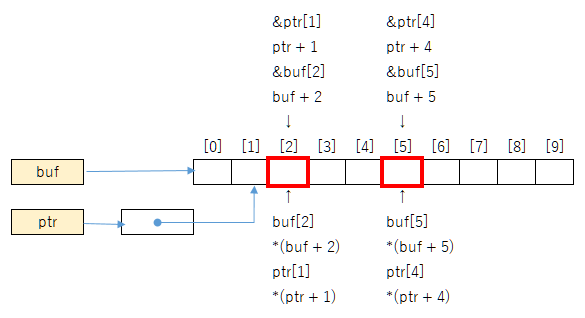

上と下で分けていますが、上の段は参照先アドレスを示すものであって、配列の中身を示すものではありません。  
下の段は、配列の実体となるメモリ（箱）を示しており、Readとして利用すると配列の中身を返し、Writeとして代入すると配列の中身を変更する操作となります。

```c++
char ch = buf[2]; // Read
buf[2] = 'A';     // Write
```

下の段はメモリの箱を示すものであるため代入は出来ますが、上の段は単なる計算したアドレスでありメモリとして書き込むための箱を持っていないため代入は出来ません。

```c++
ptr + 1 = buf;  // 代入はできない
&ptr[1] = buf;  // 代入はできない
```

### 2重ポインタ

1つのポインタなら大丈夫でも、以下のように `**` と2つになると分からなくなる人もいるかもしれません。

```c++
char buf[10];
char* ptr = buf;
char** ptr2 = &ptr;
```

`ptr2`という2重ポインタが出てきましたが、そのメモリイメージを図示すると以下となります。

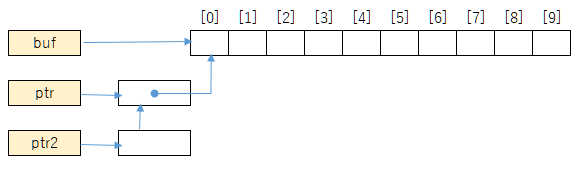

`ptr2`には、`char *` を参照するためのメモリが確保され、そこに参照先である `char* ptr` のメモリエリアを示すアドレスが入ります。  
以下のように `ptr2`を経由して参照先を更新することで、`ptr`の変数も変更されます。

```c++
*ptr2 = buf + 1;
// 上記により ptr = buf + 1 となる
```

`ptr2`経由で配列の中身にアクセスする際には、以下のような記述を行います。

```
char ch1 = **ptr2;
char ch2 = (*ptr2)[1];
char ch3 = *((*ptr2) + 2);

**ptr2 = 'A';
(*ptr2)[1] = 'B';
*((*ptr2) + 2) = 'C';
```

`*ptr2`によって`ptr`と同じように `char*`型となり、それに続けてさらに `[1]` のような配列指定したり、先頭に `*` を付けたりすることで `char` の実体であるメモリの箱を示すことになります。

ポインタとは、参照先となるアドレスを保持するための変数であり、その変数を経由して間接的に実体のメモリへアクセスできるようになる感覚を理解できればポインタを使いこなせるようになります。